# **Zero-Shot Image Classification**
Zero-shot image classification is the task of classifying images into different categories using a model that was not explicitly trained on data containing labeled examples from those specific categories.

We shall use a CLIP model from OpenAI to perform zero-shot image classification using PyTorch.

### **1. Install and Import Required Libraries**

In [ ]:
!pip install transformers

In [ ]:
import torch
import requests

from transformers import pipeline, AutoProcessor, AutoModelForZeroShotImageClassification
from PIL import Image

### **2. Zero-Shot Image Classification using Manual Approach**

In [ ]:
url = "https://unsplash.com/photos/xBRQfR2bqNI/download?ixid=MnwxMjA3fDB8MXxhbGx8fHx8fHx8fHwxNjc4Mzg4ODEx&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)

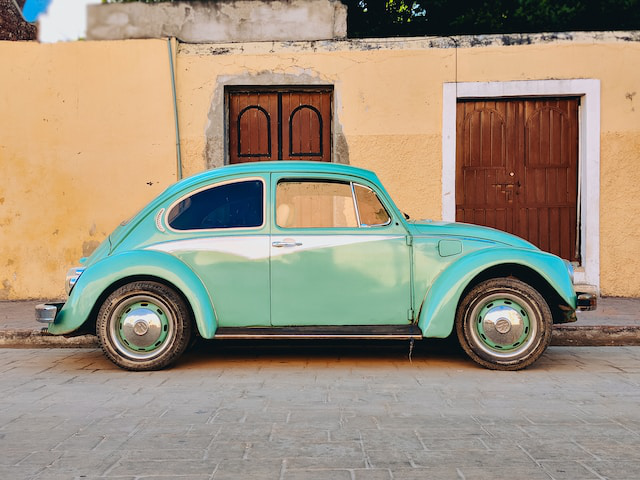

In [ ]:
image

In [ ]:
model_checkpoint = 'openai/clip-vit-large-patch14'

processor = AutoProcessor.from_pretrained(model_checkpoint)
model = AutoModelForZeroShotImageClassification.from_pretrained(model_checkpoint)

In [ ]:
candidate_labels = ['tree', 'car', 'bike', 'cat']
inputs = processor(images=image, text=candidate_labels, padding=True, return_tensors='pt')

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()

result = [{'score': score, 'label': candidate_label}
          for score , candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])]

result

[{'score': 0.9985788, 'label': 'car'},
 {'score': 0.0010499519, 'label': 'bike'},
 {'score': 0.00034005352, 'label': 'tree'},
 {'score': 3.1229043e-05, 'label': 'cat'}]

### **3. Zero-Shot Image Classification using Pipeline**

In [ ]:
url = "https://unsplash.com/photos/g8oS8-82DxI/download?ixid=MnwxMjA3fDB8MXx0b3BpY3x8SnBnNktpZGwtSGt8fHx8fDJ8fDE2NzgxMDYwODc&force=true&w=640"
image = Image.open(requests.get(url, stream=True).raw)

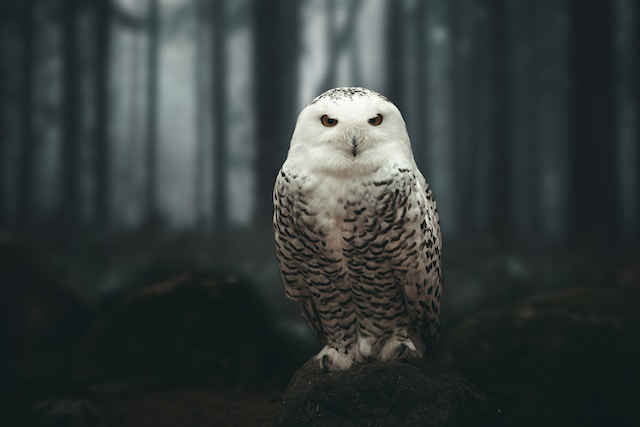

In [ ]:
image

In [ ]:
classifier = pipeline('zero-shot-image-classification', model=model_checkpoint)

In [ ]:
predictions = classifier(image, candidate_labels=['fox', 'bear', 'seagull', 'owl'])
predictions

[{'score': 0.9993906021118164, 'label': 'owl'},
 {'score': 0.0004691400972660631, 'label': 'seagull'},
 {'score': 7.745895709376782e-05, 'label': 'fox'},
 {'score': 6.275306805036962e-05, 'label': 'bear'}]